In [172]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [173]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [174]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [176]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [177]:
nulltr=train.isnull().sum()
nulltr

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [178]:
nullte=test.isnull().sum()
nullte

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [179]:
nulls_percentage = nulltr[nulltr!=0]/train.shape[0]*100
print('The percentages of null values in Train Dataset:\n')
print(round(nulls_percentage,2))

The percentages of null values in Train Dataset:

Age         19.87
Cabin       77.10
Embarked     0.22
dtype: float64


In [180]:
nulls_percentage = nullte[nullte!=0]/test.shape[0]*100
print('The percentages of null values in Test Dataset:\n')
print(round(nulls_percentage,2))

The percentages of null values in Test Dataset:

Age      20.57
Fare      0.24
Cabin    78.23
dtype: float64


In [181]:
data=[train,test]

In [182]:
for dataset in data:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    

drop_column = ['Cabin', 'Ticket']
train.drop(drop_column, axis=1, inplace = True)
test.drop(drop_column,axis=1,inplace=True)


print(train.isnull().sum())
print("-"*10)
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
----------
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [183]:
print(train.shape)
print(test.shape)

(891, 10)
(418, 9)


In [184]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [185]:
label=LabelEncoder()
for dataset in data:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [186]:
train['Sex_Code']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex_Code, Length: 891, dtype: int64

In [187]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Code,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Mr
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,1,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,0,Mrs


In [188]:
# def cls(x):
#         if x=="Mr":
#             return 1
#         elif x=='Miss':
#             return 2
#         elif x=='Mrs':
#             return 3
#         elif x=='Master':
#             return 4
#         else:
#             return 5

In [189]:
min = 10
title_names = (train['Title'].value_counts() < min)

In [190]:
train['Title'] = train['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

In [191]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [192]:
min1=10
title_names1 = (test['Title'].value_counts() < min1)

In [193]:
test['Title'] = test['Title'].apply(lambda x: 'Misc' if title_names1.loc[x] == True else x)

In [194]:
test['Title']

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Misc
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object

In [195]:
train['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    Misc
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [196]:
Title_tr=pd.get_dummies(train['Title'])
Title_tr

,Master,Misc,Miss,Mr,Mrs
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,0,1,0
...,...,...,...,...,...
886,0,1,0,0,0
887,0,0,1,0,0
888,0,0,1,0,0
889,0,0,0,1,0


In [197]:
Title_test=pd.get_dummies(test['Title'])
Title_test

,Master,Misc,Miss,Mr,Mrs
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,0,1
...,...,...,...,...,...
413,0,0,0,1,0
414,0,1,0,0,0
415,0,0,0,1,0
416,0,0,0,1,0


In [198]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Sex_Code         int64
Title           object
dtype: object

In [199]:
del train['Title']

In [200]:
del test['Title']

In [201]:
del train['Name']
del test['Name']

In [202]:
embartr=pd.get_dummies(train['Embarked'])
embarte=pd.get_dummies(test['Embarked'])

In [203]:
sextr=pd.get_dummies(train['Sex'])
sexte=pd.get_dummies(test['Sex'])

In [204]:
df=[train,sextr,embartr,Title_tr]

df_train=pd.concat(df,axis=1)

In [205]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Code,female,male,C,Q,S,Master,Misc,Miss,Mr,Mrs
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1,0,0,1,0,0,0,1,0
1,2,1,1,female,38.0,1,0,71.2833,C,0,1,0,1,0,0,0,0,0,0,1
2,3,1,3,female,26.0,0,0,7.9250,S,0,1,0,0,0,1,0,0,1,0,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,1,0,0,0,1,0,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,1,0,1,0,0,1,0,1,0,0,0
887,888,1,1,female,19.0,0,0,30.0000,S,0,1,0,0,0,1,0,0,1,0,0
888,889,0,3,female,28.0,1,2,23.4500,S,0,1,0,0,0,1,0,0,1,0,0
889,890,1,1,male,26.0,0,0,30.0000,C,1,0,1,1,0,0,0,0,0,1,0


In [206]:
del df_train['Sex_Code']
del df_train['Embarked']

In [207]:
del df_train['Sex']

In [208]:
df2=[test,sexte,embarte,Title_test]
df_test=pd.concat(df2,axis=1)

In [209]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Code,female,male,C,Q,S,Master,Misc,Miss,Mr,Mrs
0,892,3,male,34.5,0,0,7.8292,Q,1,0,1,0,1,0,0,0,0,1,0
1,893,3,female,47.0,1,0,7.0000,S,0,1,0,0,0,1,0,0,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,1,0,1,0,1,0,0,0,0,1,0
3,895,3,male,27.0,0,0,8.6625,S,1,0,1,0,0,1,0,0,0,1,0
4,896,3,female,22.0,1,1,12.2875,S,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,8.0500,S,1,0,1,0,0,1,0,0,0,1,0
414,1306,1,female,39.0,0,0,108.9000,C,0,1,0,1,0,0,0,1,0,0,0
415,1307,3,male,38.5,0,0,7.2500,S,1,0,1,0,0,1,0,0,0,1,0
416,1308,3,male,27.0,0,0,8.0500,S,1,0,1,0,0,1,0,0,0,1,0


In [210]:
del df_test['Embarked']
del df_test['Sex']
del df_test['Sex_Code']

In [211]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Master,Misc,Miss,Mr,Mrs
0,892,3,34.5,0,0,7.8292,0,1,0,1,0,0,0,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0,0,0,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1,0,0,0,1,0
4,896,3,22.0,1,1,12.2875,1,0,0,0,1,0,0,0,0,1


In [212]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Master,Misc,Miss,Mr,Mrs
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,1,0


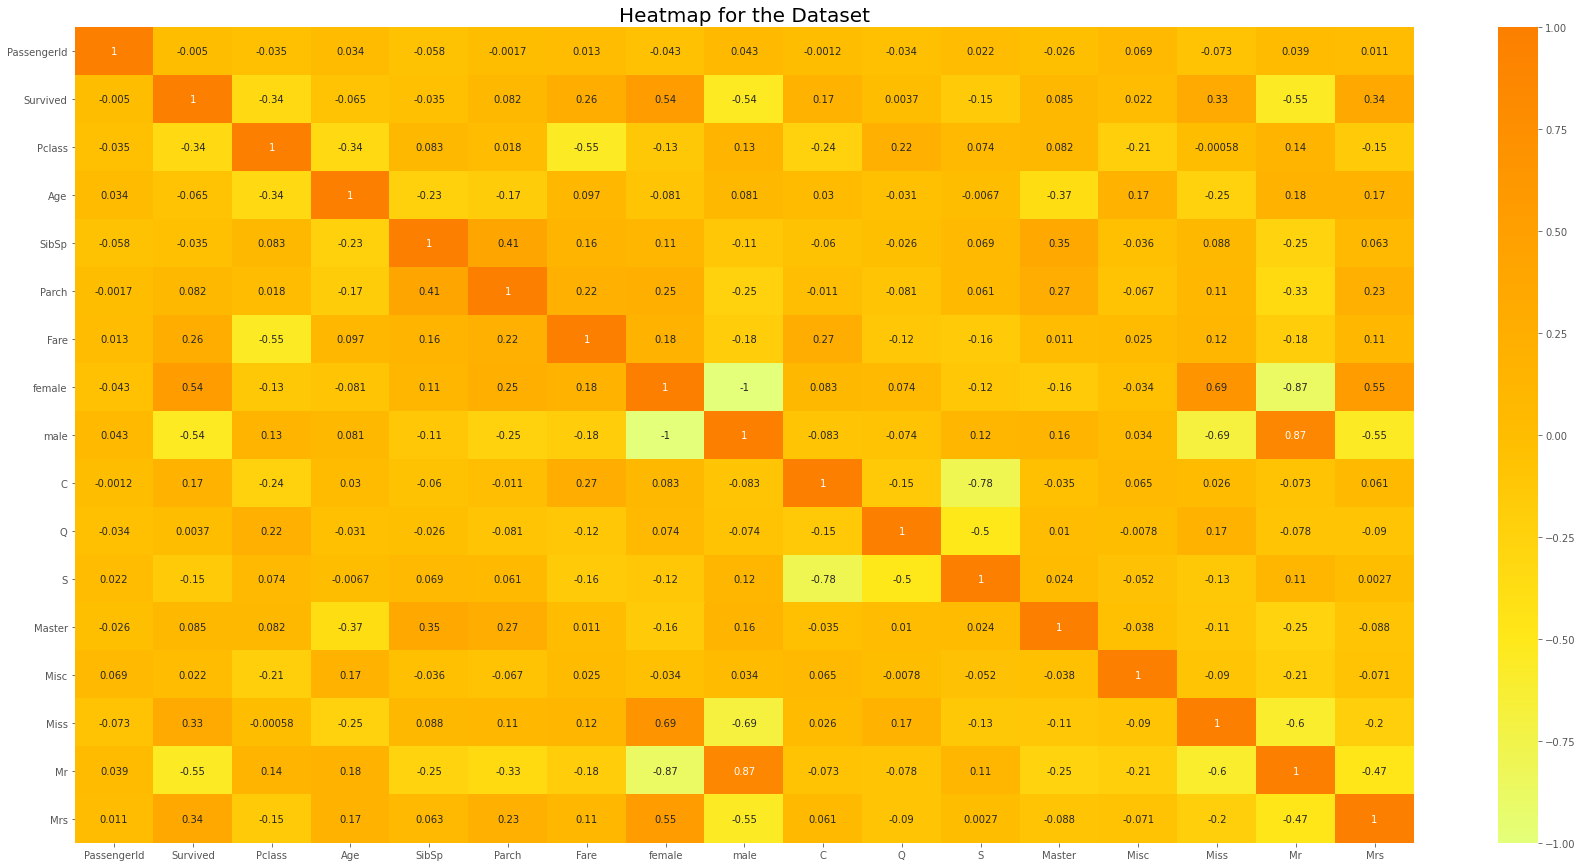

In [216]:
plt.rcParams['figure.figsize'] = (30, 15)
plt.style.use('ggplot')
sns.heatmap(df_train.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

In [214]:
corr=df_train.corr()
corr["Survived"].sort_values(ascending=False)

Survived       1.000000
female         0.543351
Mrs            0.339040
Miss           0.327093
Fare           0.257307
C              0.168240
Master         0.085221
Parch          0.081629
Misc           0.022030
Q              0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
S             -0.149683
Pclass        -0.338481
male          -0.543351
Mr            -0.549199
Name: Survived, dtype: float64

In [225]:
from sklearn.model_selection import train_test_split

predictors = df_train.drop(['Survived', 'PassengerId'], axis=1)
target = df_train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [226]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

77.66


In [227]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

81.73


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [228]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

72.59


In [229]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

76.65


In [230]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

83.25


In [231]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

75.63


In [232]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

85.79


In [235]:
ids = df_test['PassengerId']
predictions = randomforest .predict(df_test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submit2.csv', index=False)